# The Foundation

In [1]:
# core processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# model
import statsmodels.api as sm
import statsmodels.formula.api as smf



## Main Model

In [2]:
# all data found on github repo
df_reviews = pd.read_csv('https://tinyurl.com/moviereviewsdata')

model_lr_rating = smf.ols('rating ~ word_count', data = df_reviews).fit()

model_lr_rating.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
No. Observations:                1000   F-statistic:                     134.1
Covariance Type:            nonrobust   Prob (F-statistic):           3.47e-29
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4916      0.042     82.431      0.000       3.409       3.575
word_count    -0.0427      0.004    -11.580      0.000      -0.050      -0.035
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
all_predictions = model_lr_rating.predict()

df_prediction = pd.DataFrame({'word_count': [5]})
single_prediction = model_lr_rating.predict(df_prediction)

In [7]:
pred_intervals = (
    model_lr_rating
    .get_prediction(df_prediction)
    .summary_frame(alpha = 0.05)
)

pred_intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.278219,0.027067,3.225105,3.331334,2.11779,4.438649


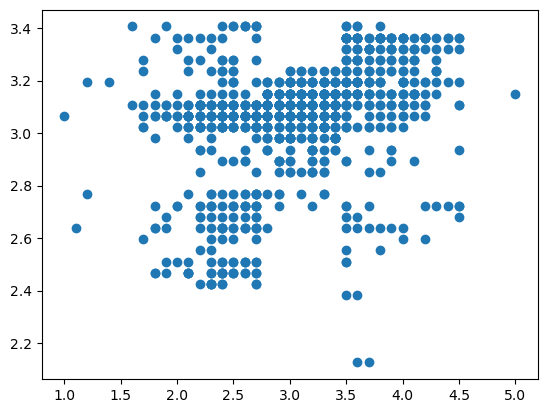

In [5]:
predictions = model_lr_rating.predict()
y = df_reviews.rating

plt.scatter(y, predictions)

In [6]:
np.sqrt(model_lr_rating.scale)   # RMSE

0.590728780660127

## Multiple Features

In [7]:
model_lr_rating_extra = smf.ols(
    formula = 'rating ~ word_count \
        + age \
        + review_year \
        + release_year \
        + length_minutes \
        + children_in_home \
        + total_reviews',
    data = df_reviews
).fit()

model_lr_rating_extra.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
No. Observations:                1000   F-statistic:                     67.02
Covariance Type:            nonrobust   Prob (F-statistic):           3.73e-79
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -45.5688      7.463     -6.106      0.000     -60.215     -30.923
word_count          -0.0303      0.003     -9.102      0.000      -0.037      -0.024
age                 -0.0017      0.001     -1.825      0.068      -0.004       0.000
review_year          0.0099      0.003      3.055      0.002       0.004       0.016
release_year         0.0133      0.002      7.434      0.000       0.010       0.017
length_minutes       0.0167      0.002     10.897      0.000       0.014       0.020
children_in_home     0.1028      0.025      4.051      0.000       0.053       0.153
total_reviews     7.616e-05   6.16e-06     12.362      0.000    6.41e-05    8.83e-05
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
predict_observation = pd.DataFrame(
    {
        'word_count': 12,
        'age': 30,
        'children_in_home': 1,
        'review_year': 2020,
        'release_year': 2015,
        'length_minutes': 100,
        'total_reviews': 10000
    },
    index = ['new_observation']
)

model_lr_rating_extra.predict(predict_observation)

new_observation    3.259518
dtype: float64

In [9]:
model_lr_cat = smf.ols(
    formula = "rating ~ word_count + season",
    data = df_reviews
).fit()

model_lr_cat.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
No. Observations:                1000   F-statistic:                     53.09
Covariance Type:            nonrobust   Prob (F-statistic):           1.41e-40
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.3429      0.053     63.109      0.000       3.239       3.447
season[T.Spring]    -0.0301      0.062     -0.483      0.629      -0.152       0.092
season[T.Summer]     0.2743      0.044      6.171      0.000       0.187       0.362
season[T.Winter]    -0.0700      0.059     -1.177      0.239      -0.187       0.047
word_count          -0.0394      0.004    -10.963      0.000      -0.047      -0.032
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
sm.stats.anova_lm(model_lr_cat)

,df,sum_sq,mean_sq,F,PR(>F)
season,3.0,30.166074,10.055358,30.731027,5.301654e-19
word_count,1.0,39.322588,39.322588,120.177074,1.764298e-26
Residual,995.0,325.569378,0.327205,NaN,NaN
